In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

from scipy.misc import imread, imsave
import cPickle as pickle
import yaml
import collections
from tqdm import tqdm
import time
from scipy.ndimage.interpolation import zoom
import seaborn as sns
sns.set_style("whitegrid")

import datetime
from sunrise import sun

# london GPS location
s = sun(lat=51,long=0.1)

/home/michael/anaconda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
/home/michael/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
resultsdir = '/media/michael/SeagateData/alison_data/predictions_%s/'

In [4]:
mapper = {'biotic': 'CityBioNet', 'anthrop': 'CityAnthroNet'}

def summary_from_fname(fpath):
    """For a single results file, return the predicted activity level"""
    preds = np.load(fpath)[:, 1]
    preds[np.isnan(preds)] = 0
    return np.mean(preds)

def fname_to_time(fname):
    """From a filename, extract the time"""
    return fname.split('_')[-1][:4]


def datetime_to_decimal(dt):
    """Convert datetime object to time as hour in decmals"""
    return float(dt.hour) + dt.minute / 60.0


def get_times_and_averages(base, classname):
    results = collections.defaultdict(list)
    
    this_base = (resultsdir % classname) + base
    fnames = os.listdir(this_base)
    
    for fname in fnames:
        time = fname_to_time(fname)
        results[time].append(summary_from_fname(this_base + fname))

    averages = []
    times = []
    
    # loop over each time and get the keys and summaries
    for hour in range(24):
        for half in [0, 1]:
            key = '%02d%02d' % (hour, half*30)
            averages.append(np.mean(results[key]))
            times.append(hour + half * 0.5 + 0.25)
    return times, averages, fnames


s_font = 22
l_font = 24
lwidth = 3

def plot_results(base, classname):
    """For a filename base, plot all theresults summaries"""
    times, averages, fnames = get_times_and_averages(base, classname)

    # Plotting activity levels
    plt.plot(times, averages, label=mapper[classname], linewidth=lwidth)
    plt.xlabel('Hour of day', fontsize=l_font)
    plt.ylabel('Level of activity', fontsize=l_font)
    plt.xlim(0, 24)
    plt.ylim(0, 1)
    plt.xticks([0, 6, 12, 18, 24], ['00:00', '06:00', '12:00', '18:00', '24:00'], fontsize=s_font)
    #plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=14)
    plt.yticks([0, 1.0], fontsize=s_font)

    # Plotting sunset/sunrise times
    print "Warning - just using first recording for sunset..."
    datestr = fnames[0].split('_')[1]
    when = datetime.datetime.strptime(datestr, '%Y%m%d')
    sunrise = s.sunrise(when=when)
    sunset = s.sunset(when=when)
    
    sun_colour = np.array([0.9, 0.3, 0.3])
    sr = datetime_to_decimal(sunrise)
    plt.plot([sr, sr], [0.075, 1], '--', color=sun_colour, linewidth=lwidth)
    #plt.text(sr - 1.3, 1.01, 'Sunrise', fontsize=16, color=sun_colour)
    plt.text(sr - 1.3, .015, 'Sunrise', fontsize=s_font, color=sun_colour)
    
    ss = datetime_to_decimal(sunset)
    plt.plot([ss, ss], [0.075, 1], '--', color=sun_colour, linewidth=lwidth)
    plt.text(ss - 1.3, .015, 'Sunset', fontsize=s_font, color=sun_colour)
    
    return averages

    
def set_up_plot():
    plt.figure(figsize=(10, 5))
#     ax = plt.subplot(111)
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

In [5]:
save_dir = '../../plots/'

Warning - just using first recording for sunset...
Warning - just using first recording for sunset...


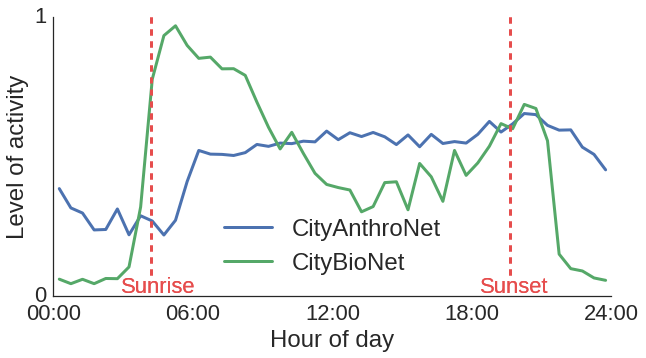

In [10]:
site = '1/2015/IG62XL/SM2+/'

avgs = {}
set_up_plot()
avgs['anthrop'] = plot_results(site, 'anthrop')
avgs['biotic'] = plot_results(site, 'biotic')
plt.legend(fontsize=l_font, loc='lower center', bbox_to_anchor=(0.5, 0.0))

sns.set_style("white")
sns.despine()

savename = site.replace('/', '_')
plt.savefig(save_dir + '/%s.png' % savename, dpi=200,bbox_inches='tight')
plt.savefig(save_dir + '/%s.pdf' % savename,bbox_inches='tight')

# saving to csv file
with open(save_dir + '/%s.csv' % savename, 'w') as f:
    for name, res in avgs.items():
        f.write(name + ',' + ','.join(map(str, res)) + '\n')

Warning - just using first recording for sunset...
Warning - just using first recording for sunset...


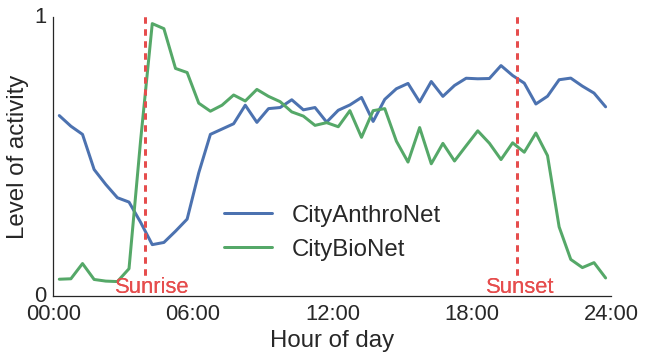

In [12]:
site = '/1/2015/E29RR/250515-010615/SM2+/'

set_up_plot()
avgs['anthrop'] = plot_results(site, 'anthrop')
avgs['biotic'] = plot_results(site, 'biotic')
plt.legend(fontsize=l_font, loc='lower center', bbox_to_anchor=(0.5, 0.05))

sns.set_style("white")
sns.despine()

savename = site.replace('/', '_')
plt.savefig(save_dir + '/%s.png' % savename, dpi=200,bbox_inches='tight')
plt.savefig(save_dir + '/%s.pdf' % savename, bbox_inches='tight')

# saving to csv file
with open(save_dir + '/%s.csv' % savename, 'w') as f:
    for name, res in avgs.items():
        f.write(name + ',' + ','.join(map(str, res)) + '\n')